In [1]:
import tensorflow as tf

In [2]:
mnsit = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images,test_labels) = mnsit.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

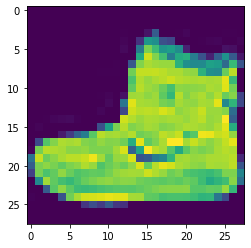

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [5]:
training_images = training_images/255
test_images = test_images/255

In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [12]:
model.compile(optimizer= tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')

In [15]:
model.fit(training_images,training_labels, epochs = 100)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2475
Epoch 5/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2386
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2324
Epoch 7/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2242
Epoch 8/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2185
Epoch 9/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2098
Epoch 10/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2067
Epoch 11/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2009
Epoch 12/100
1875/1875 [==============================] - 5s 2ms/step - lo

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0496
Epoch 98/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0539
Epoch 99/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0470
Epoch 100/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0512


In [16]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.7901


0.7901257872581482

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if (logs.get('loss')<0.4):
            print('\n Reached 60% accuracy cancelling training')
            self.model.stop_training = True

        

In [18]:
callbacks = myCallback()
model = model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [19]:
model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy')
model.fit(training_images,training_labels,epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4710
Epoch 2/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.3575
 Reached 60% accuracy cancelling training
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3571
